In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import nltk
import re
import string
import csv
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import numpy as np



In [29]:
a=[]
#Opening the file and reading data
with open('final_stock.csv', "r",encoding="Latin1") as f:
    data=csv.reader(f, delimiter=',')
    Date,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,company,article,lable=zip(*data)
    
    date=list(Date[1:])
    pxopen=list(PX_OPEN[1:])
    pxhigh=list(PX_HIGH[1:])
    pxlow=list(PX_LOW[1:])
    pxlast=(PX_LAST[1:])
    pxvol=list(PX_VOLUME[1:])
    company=list(company[1:])
    news=list(article[1:])
    sent=list(lable[1:])
    sentiment_new=[]
    #NLTK Sentiment Analyzer - Vader
    sid = SentimentIntensityAnalyzer()
    for news1 in news:
        ss = sid.polarity_scores(news1)
        sentiment_new.append(ss)

    negative = [val['neg'] for val in sentiment_new]
    positive = [val['pos'] for val in sentiment_new]
    #neutral = [val['neu'] for val in sentiment_new]
    compound = [val['compound'] for val in sentiment_new]


    data1 = {'date':date,'Article':news,'open_price':pxopen,'high':pxhigh,'low':pxlow,'Last':pxlast,'Neg':negative,'positive':positive,'company':company,'sentiment_words':sent,}
    df_senti = pd.DataFrame(data1)
    cols = df_senti.columns.tolist()
    cols1 = [ 'date','Article','open_price', 'Last', 'high', 'low','Neg', 'positive','sentiment_words','company']
    df_senti=df_senti[cols1]
    df_senti['sentiment_nltk'] = df_senti[['positive','Neg']].idxmax(axis=1)
    df_senti['final_sentiment'] = np.where(df_senti['sentiment_nltk']=='positive', 2, 1)
    #df_senti.to_csv('final_data_new_sentiment.csv')


    #Changing the format of numbers to numeric for corellation to work
    df_senti[['open_price','Last','high','low','final_sentiment','sentiment_words']] = df_senti[['open_price','Last','high','low','final_sentiment','sentiment_words']].apply(pd.to_numeric)

    #Changing format of date to plot the sentiments 
    df_senti['date'] =  pd.to_datetime(df_senti['date'])

    #Getting corellation for all the companies 
    list_to_use1 = ['Wells fargo','Citigroup','chase','Bank of America']
    for company in list_to_use1:
        data_use = df_senti[df_senti['company'] == company.lower()]
        print("Corellation for " + company)
        data_use.corr()

    



Corellation for Wells fargo


,open_price,Last,high,low,Neg,positive,sentiment_words,final_sentiment
open_price,1.000000,0.944223,0.978691,0.978479,0.226359,0.299955,-0.313309,0.045647
Last,0.944223,1.000000,0.975021,0.979709,0.243966,0.290895,-0.316069,-0.009868
high,0.978691,0.975021,1.000000,0.981187,0.266838,0.330801,-0.339162,0.000097
low,0.978479,0.979709,0.981187,1.000000,0.219390,0.284936,-0.352950,0.008623
Neg,0.226359,0.243966,0.266838,0.219390,1.000000,-0.053288,0.121639,-0.689320
positive,0.299955,0.290895,0.330801,0.284936,-0.053288,1.000000,-0.235923,0.411226
sentiment_words,-0.313309,-0.316069,-0.339162,-0.352950,0.121639,-0.235923,1.000000,-0.103980
final_sentiment,0.045647,-0.009868,0.000097,0.008623,-0.689320,0.411226,-0.103980,1.000000


Corellation for Citigroup


,open_price,Last,high,low,Neg,positive,sentiment_words,final_sentiment
open_price,1.000000,0.801667,0.924777,0.909768,0.260331,-0.284917,0.048225,-0.338601
Last,0.801667,1.000000,0.894791,0.928758,0.229629,-0.129389,0.077644,-0.175340
high,0.924777,0.894791,1.000000,0.891299,0.209618,-0.231994,0.132814,-0.306678
low,0.909768,0.928758,0.891299,1.000000,0.310976,-0.181304,0.056986,-0.253291
Neg,0.260331,0.229629,0.209618,0.310976,1.000000,0.019497,-0.136166,-0.701423
positive,-0.284917,-0.129389,-0.231994,-0.181304,0.019497,1.000000,0.219307,0.426299
sentiment_words,0.048225,0.077644,0.132814,0.056986,-0.136166,0.219307,1.000000,0.170561
final_sentiment,-0.338601,-0.175340,-0.306678,-0.253291,-0.701423,0.426299,0.170561,1.000000


Corellation for chase


,open_price,Last,high,low,Neg,positive,sentiment_words,final_sentiment
open_price,1.000000,0.722403,0.907581,0.841078,0.061767,-0.218555,-0.371214,-0.221903
Last,0.722403,1.000000,0.846627,0.915430,0.233057,-0.238439,-0.115260,-0.124664
high,0.907581,0.846627,1.000000,0.847088,0.113206,-0.272610,-0.311209,-0.175348
low,0.841078,0.915430,0.847088,1.000000,0.192137,-0.270810,-0.208010,-0.211327
Neg,0.061767,0.233057,0.113206,0.192137,1.000000,-0.301620,0.273644,-0.621718
positive,-0.218555,-0.238439,-0.272610,-0.270810,-0.301620,1.000000,0.012178,0.562385
sentiment_words,-0.371214,-0.115260,-0.311209,-0.208010,0.273644,0.012178,1.000000,-0.048582
final_sentiment,-0.221903,-0.124664,-0.175348,-0.211327,-0.621718,0.562385,-0.048582,1.000000


Corellation for Bank of America


,open_price,Last,high,low,Neg,positive,sentiment_words,final_sentiment
open_price,1.000000,0.705152,0.880074,0.890312,-0.182771,-0.168176,0.093852,0.156520
Last,0.705152,1.000000,0.846060,0.899533,-0.113325,-0.019974,0.086483,0.167768
high,0.880074,0.846060,1.000000,0.872333,-0.141191,-0.107905,0.075823,0.135465
low,0.890312,0.899533,0.872333,1.000000,-0.106328,-0.105462,0.102369,0.165865
Neg,-0.182771,-0.113325,-0.141191,-0.106328,1.000000,0.076761,-0.007631,-0.655726
positive,-0.168176,-0.019974,-0.107905,-0.105462,0.076761,1.000000,0.116365,0.381185
sentiment_words,0.093852,0.086483,0.075823,0.102369,-0.007631,0.116365,1.000000,0.230623
final_sentiment,0.156520,0.167768,0.135465,0.165865,-0.655726,0.381185,0.230623,1.000000


In [30]:
data_grpby = df_senti.groupby(['company','date'])['Last','final_sentiment','sentiment_words'].mean()
print(data_grpby)

                                  Last  final_sentiment  sentiment_words
company         date                                                    
HSBC            2018-03-01   53.593333         2.000000         0.333333
                2018-03-02   47.610000         2.000000         0.000000
                2018-03-05   49.160000         2.000000         0.600000
                2018-03-06   49.352500         2.000000         0.666667
                2018-03-07   50.714286         2.000000         0.571429
                2018-03-08   52.020000         2.000000         0.000000
                2018-03-09   49.423333         2.000000         0.333333
                2018-03-13   51.214000         2.000000         0.900000
                2018-03-15   51.530000         1.500000         1.000000
bank of america 2018-02-20   32.140000         1.666667         0.666667
                2018-02-23   31.950000         1.500000         0.500000
                2018-02-27   32.530000         1.75

Wells fargo


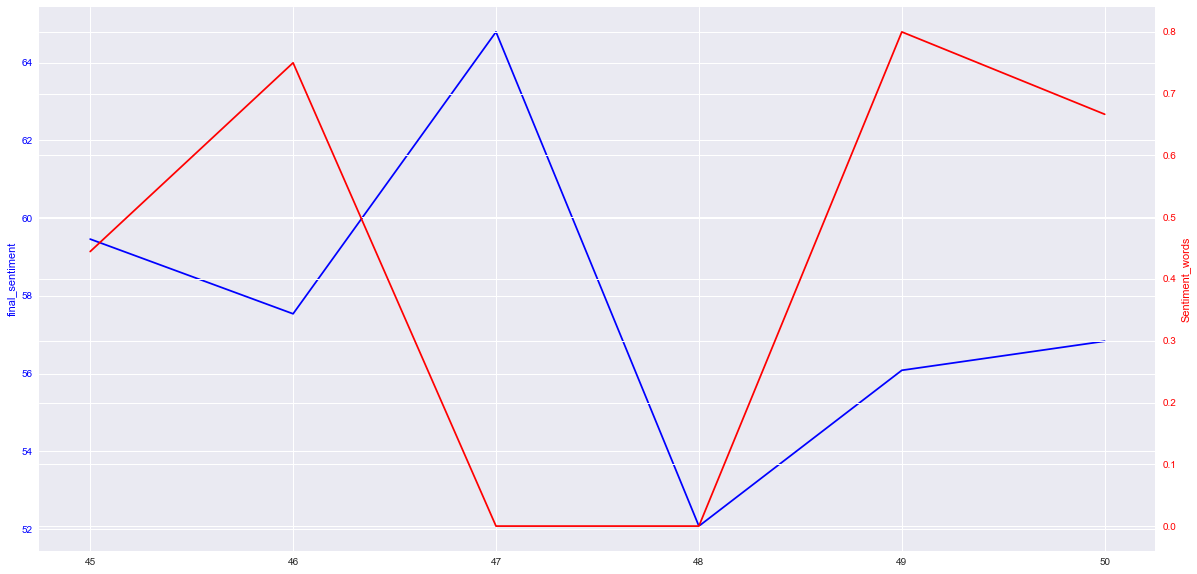

Citigroup


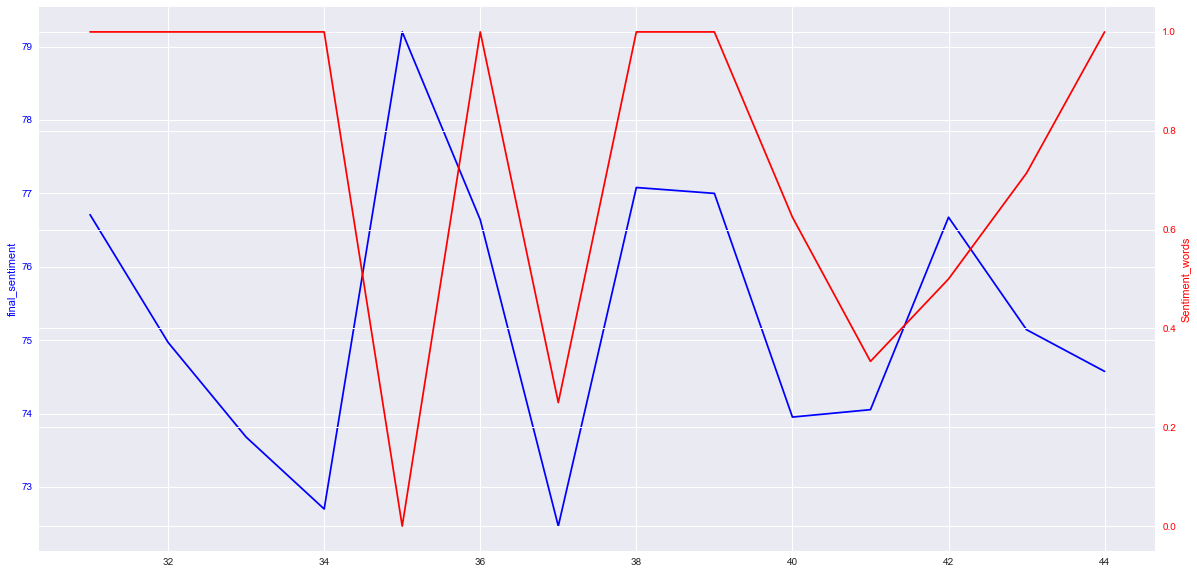

chase


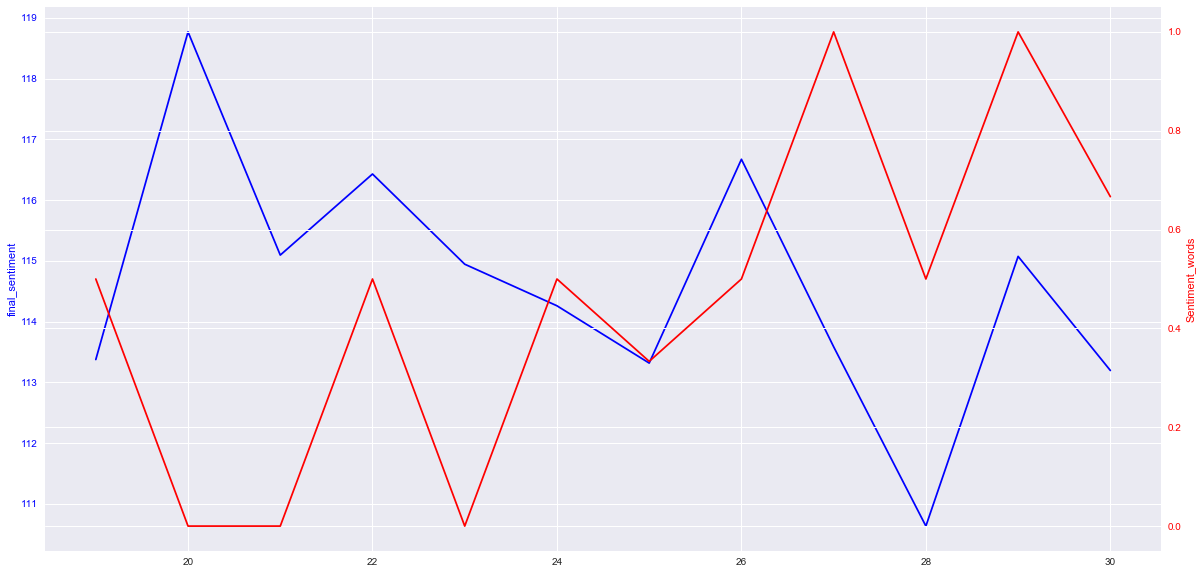

Bank of America


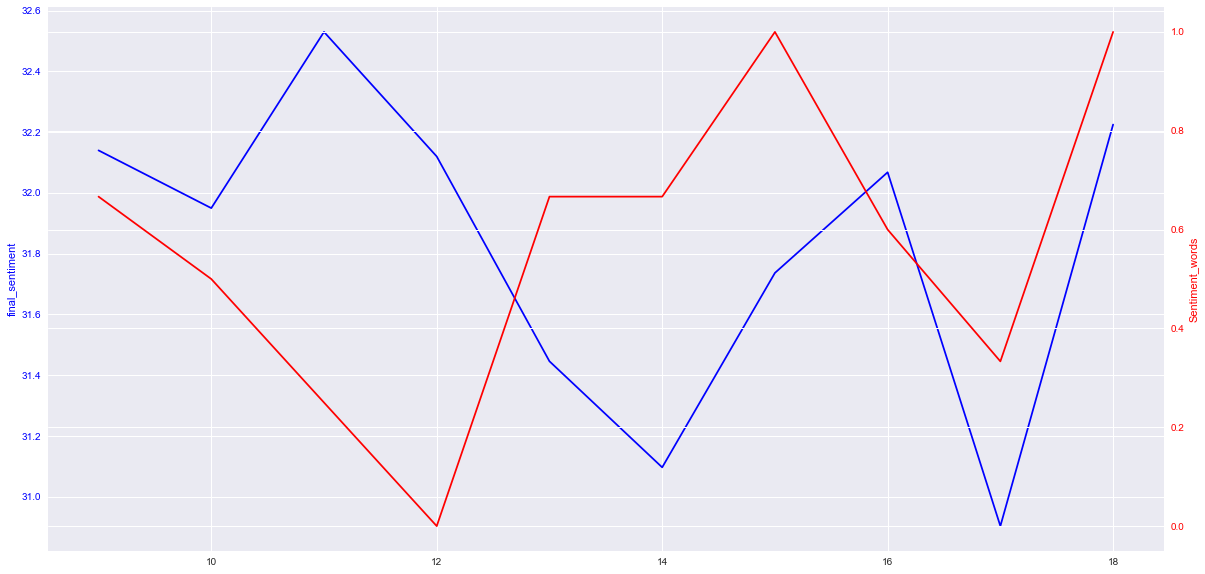

In [46]:

#Exporting data to csv
data_grpby.to_csv('final_data_new_sentiment.csv')

with open('final_data_new_sentiment.csv', "r",encoding="Latin1") as f:
    data=csv.reader(f, delimiter=',')

    data1 = list(data)
df1 = pd.DataFrame(data1[1:], index = None, columns=['company','date','Last','final_sentiment','sentiment_words'] ,)

#reference:https://matplotlib.org/examples/api/two_scales.html
#getting graph for sentiment using words
list_to_use1 = ['Wells fargo','Citigroup','chase','Bank of America']
for company in list_to_use1:
        
    data_use = df1[df1['company'] == company.lower()]
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.plot(data_use['Last'],'b-')
    #ax1.set_xlabel('date')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('final_sentiment', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(data_use['sentiment_words'],'r-')
    ax2.set_ylabel('Sentiment_words', color='r')
    ax2.tick_params('y', colors='r')

    #fig.tight_layout()
    print(company)
    plt.show()


Wells fargo


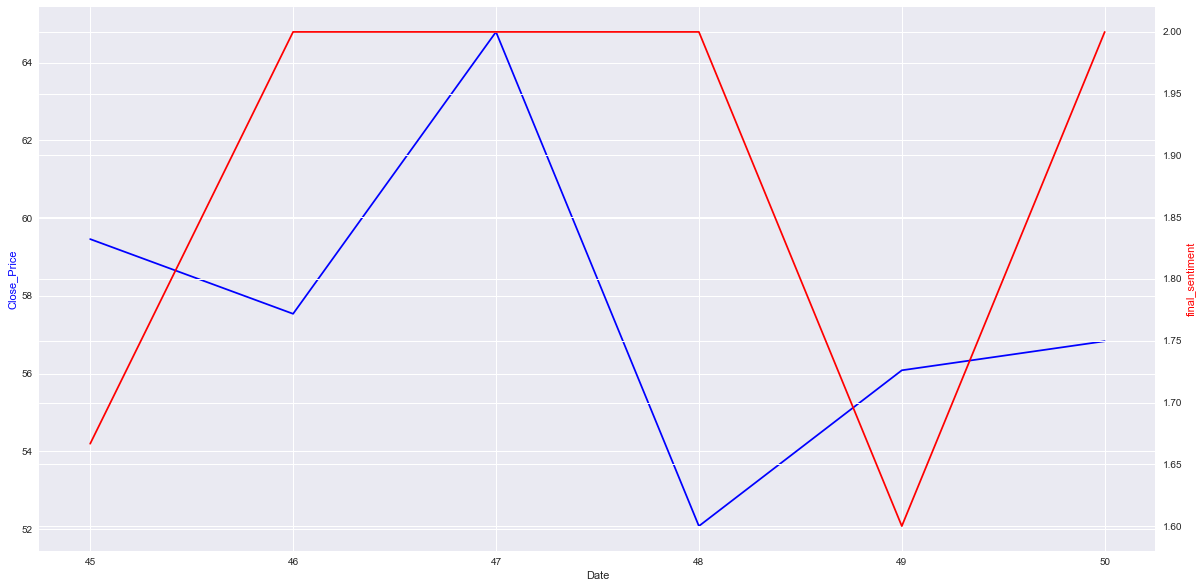

Citigroup


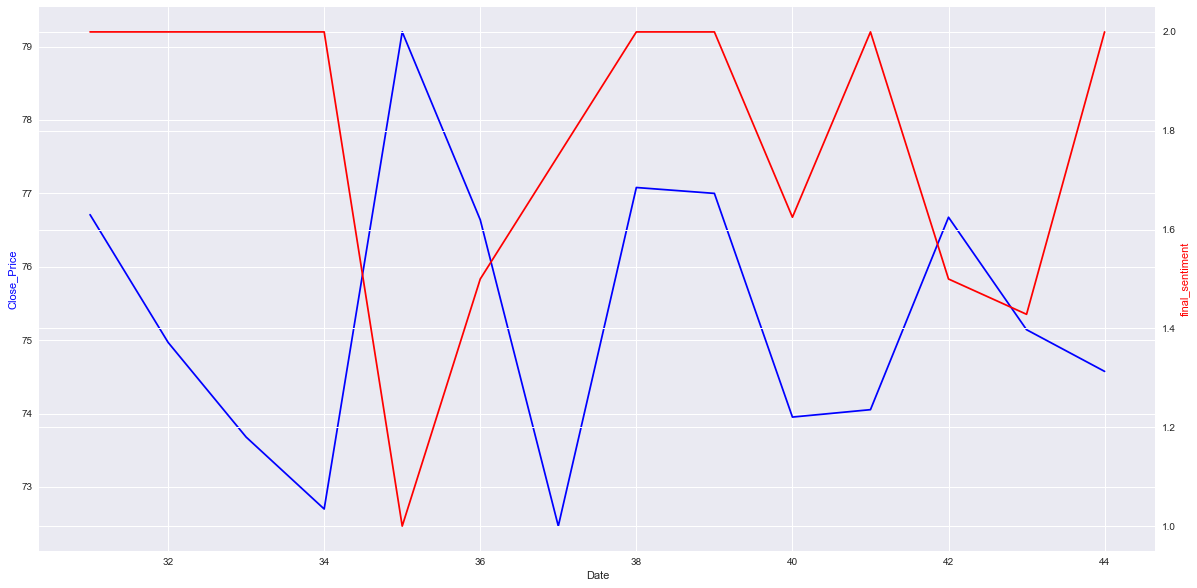

chase


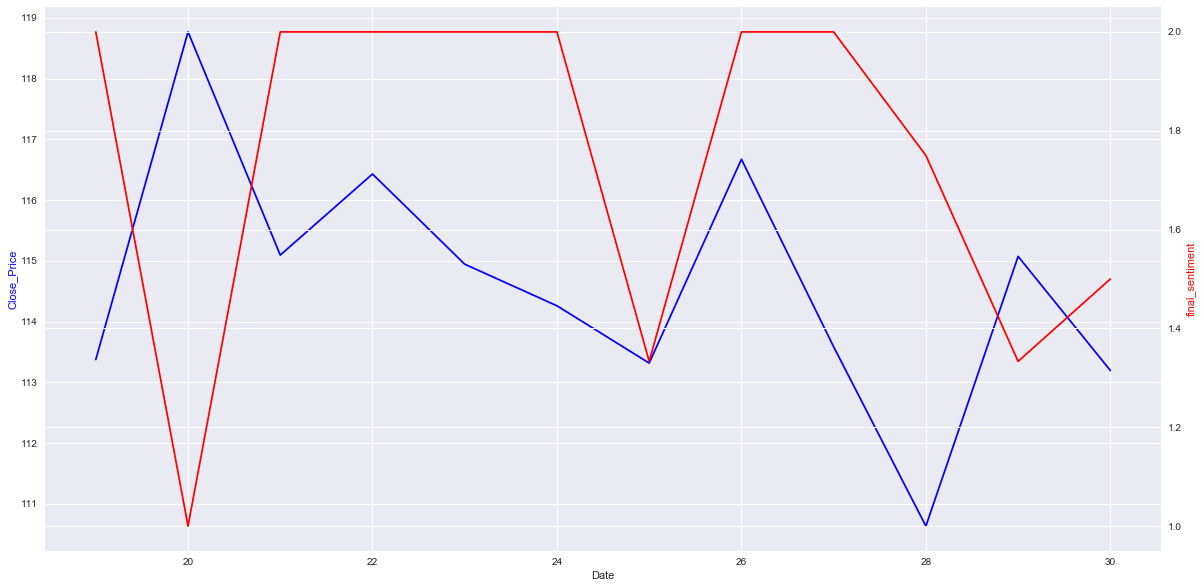

Bank of America


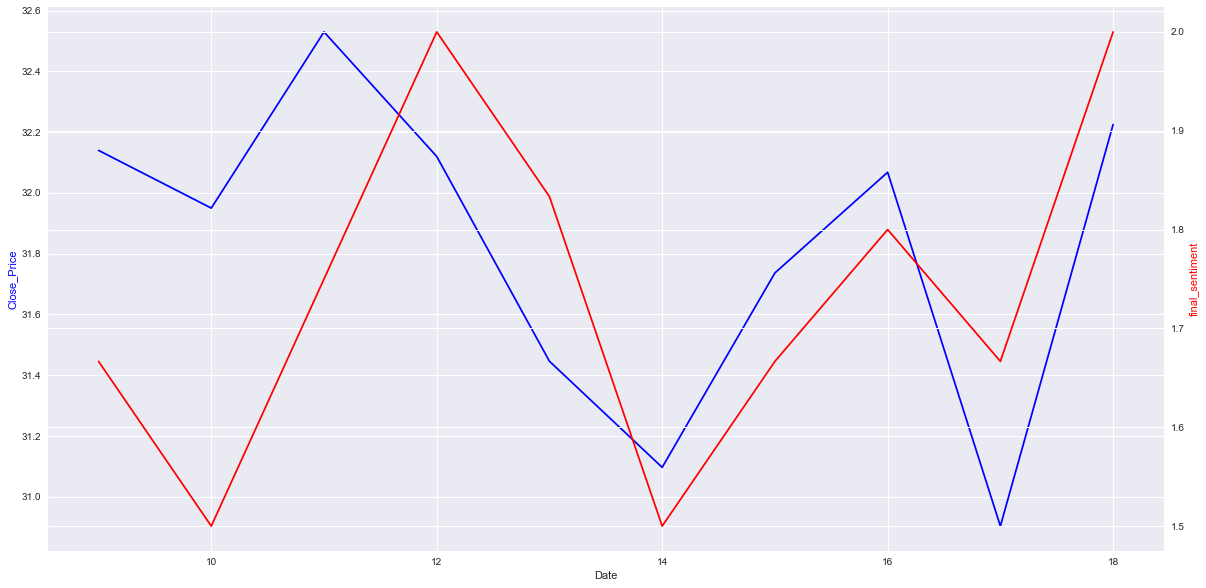

In [47]:
#Getting graphs using sentiment taken by Vader package

for company in list_to_use1:
        
    data_use = df1[df1['company'] == company.lower()]
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.plot(data_use['Last'], 'b-')
    ax1.set_xlabel('Date')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Close_Price', color='b')
    #ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(data_use['final_sentiment'],'r-')
    ax2.set_ylabel('final_sentiment', color='r')
    #ax2.tick_params('y', colors='r')

    #fig.tight_layout()
    print(company)
    plt.show()